In [7]:
# importing necessary libraries
import pandas as pd
import numpy as np

#To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To help with missing data
import missingno as msno

In [8]:
df = pd.read_csv("SyriaTel_data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df['total charge'] = (df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']) * df['account length']

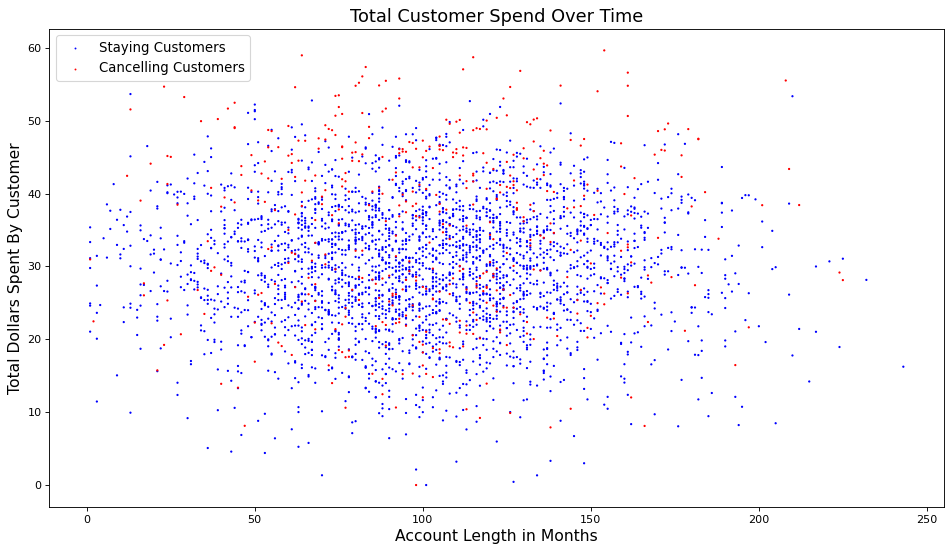

In [11]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(df['account length'], df['total day charge'], df['churn'] == 0, c="blue", label = 'Staying Customers')
plt.scatter(df['account length'], df['total day charge'], df['churn'] == 1, c="red", label = 'Cancelling Customers')
plt.title("Total Customer Spend Over Time", fontsize = 16)
plt.xlabel("Account Length in Months", fontsize = 14)
plt.ylabel("Total Dollars Spent By Customer", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'center')
plt.legend(fontsize= 12)
plt.tight_layout()
#plt.savefig('images/total_customer_spend.png')
plt.show()

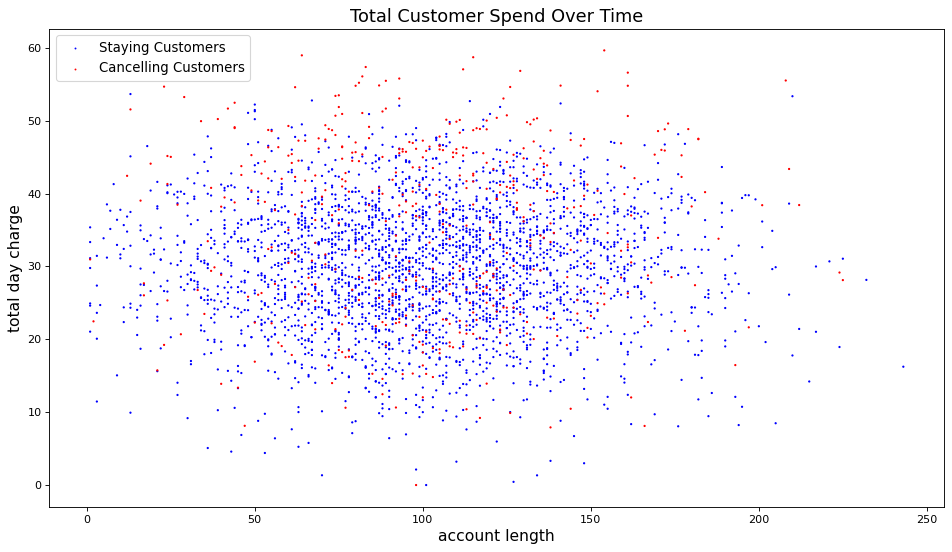

In [13]:
def plot_scatter_3_columns(df, x_col, y_col):
    '''
    Plots the total customer spend over time with differentiating churned and non-churned customers
    '''

    plt.figure(figsize=(12, 7), dpi=80)
    plt.scatter(df[x_col], df[y_col], df['churn'] == 0, c="blue", label='Staying Customers')
    plt.scatter(df[x_col], df[y_col], df['churn'] == 1, c="red", label='Cancelling Customers')
    plt.title("Total Customer Spend Over Time", fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center')
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
plot_scatter_3_columns(df, 'account length', 'total day charge')